## Model Evaluation and Conclusions

#### **Goal:** 

_Compare model performance using standard regression metrics and summarize findings and opportunities for future improvement._

_The dataset is reloaded and preprocessing is completed once again to ensure this notebook can be run independently._


In [4]:
#Libraries used for core data handling.
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

#Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Debugging and stylization
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [7]:
#Importing data for this notebook.
df = pd.read_csv("SpotifyTracksDataset.Popular.csv", encoding='cp1252')
df.head()

#Preprocessing steps from "01_Introduction_and_EDA:"

#Dropping non-predictive columns.
df_model = df.drop(columns=['track_id', 'seed_key', 'track_name', 'artist_name', 'genre'])

#Define features and target
X = df_model.drop(columns=['popularity'])
y = df_model['popularity']

In [8]:
#Reapplying Train/ Test Split and scaling.
X = df_model.drop('popularity', axis=1)
y = df_model['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Section 6: Results and Evaluation**

### **6.1 Evaluation metrics**

To evaluate model performance, three regression metrics were calculated for each algorithm:

- Root Mean Squared Error (RMSE): Standardized way of measuring prediction error rate to the error rate of the target variable; minimize,
- Mean Absolute Error (MAE): Reflects "magnitude" of errors; minimize,
- R-squared: Captures how much variation in the target variable the model explains; maximize.
  
The results for the three models are summarized below. Overall, the Decision Tree model performed best across all three metrics with the lowest RMSE and MAE, and the highest R-squared score; however, all three model results presented a similar R-squared score (between 0.207 - 0.281), suggesting that while the features explain some variance in _**popularity**_, much of the variation remains unaccounted for. This is consistent with real-world expectations of music in that we know song popularity is influenced by many factors not represented in this dataset.


In [11]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN', 'Decision Tree',],
    #I've opt'd to manually enter values from applicable results in the "02_Preprocessing_and_Modeling" for the sake of simplicity.
    'RMSE': [241.0269952173001, 214.65097733129443, 218.1260742774957],
    'MAE': [12.38830359901313, 11.42970718998669, 11.458651956700832],
    'R2': [0.2065987018990234, 0.2934220339105468, 0.2819828736386565]
})

results

,Model,RMSE,MAE,R2
0,Linear Regression,241.026995,12.388304,0.206599
1,kNN,214.650977,11.429707,0.293422
2,Decision Tree,218.126074,11.458652,0.281983


### **6.2 Performance Bar Chart**

To visually compare model performance, a bar chart was generated to display the R-squared scores for each model trained. R-squared measures the proportion of variance in song **_popularity_** explained by each model, with high values inidicating better predictive power.

While the Decision Tree performed best, the overall R-squared values (0.20 - 0.28) indicate that only a modest proportion of **_popularity_** variance is explained by the features in the _Spotify Tracks Dataset_.


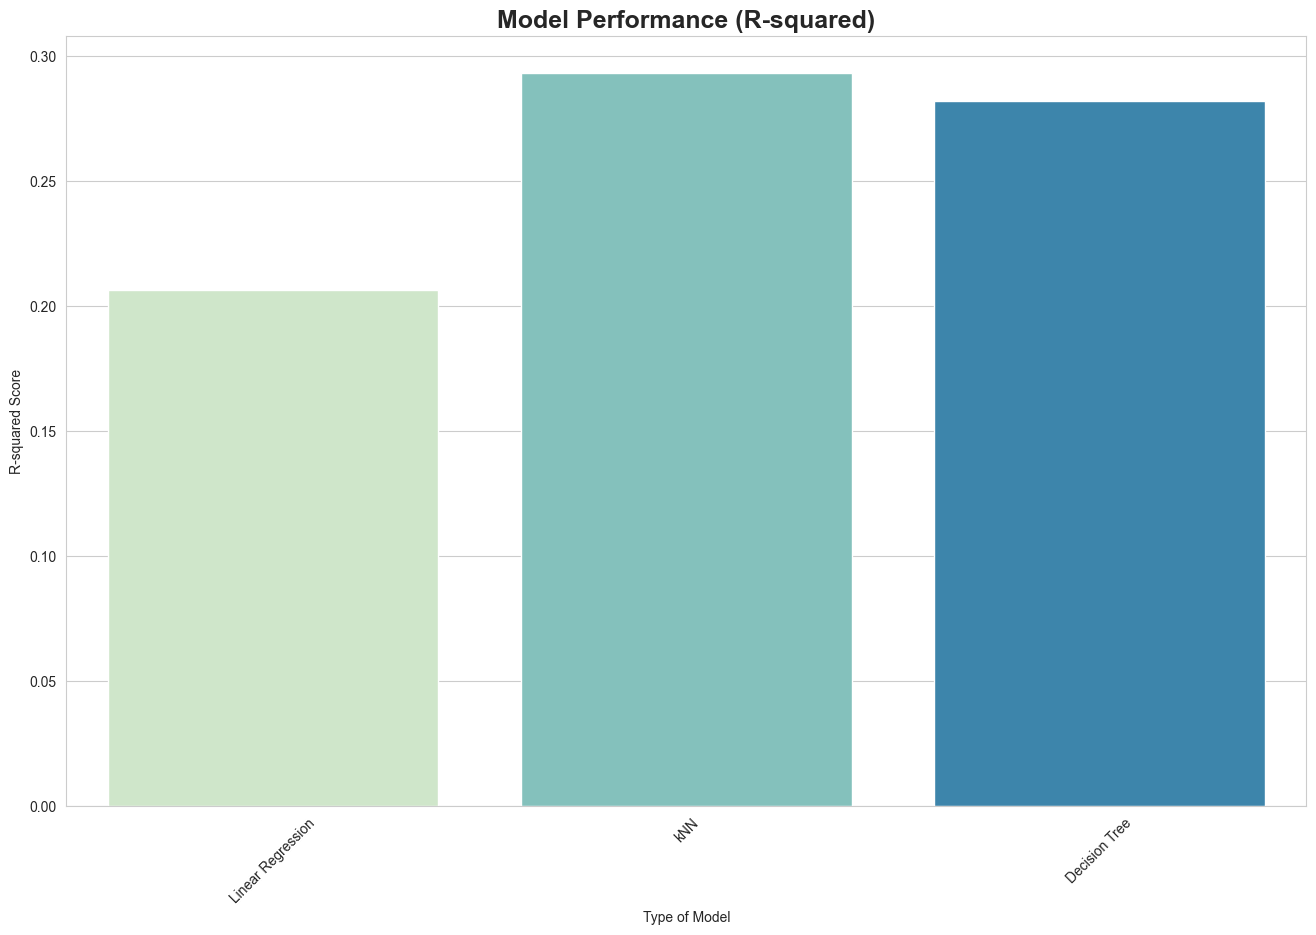

In [13]:
plt.figure(figsize = (16, 10))

sns.barplot(data = results, x = 'Model', y = 'R2', palette=sns.color_palette("GnBu", len(results)))
plt.xticks(rotation = 45)

plt.title("Model Performance (R-squared)", fontsize = 18, fontweight = "bold")
plt.xlabel("Type of Model")
plt.ylabel("R-squared Score")

plt.show()

# **Section 7: Conclusion**

### **7.1 Summary of findings**


Among the models tested, the Decision Tree achieved the best overall performance, producing the lowest error values (RMSE and MAE) and the highest R-squared score. This suggests that the relationships between audio features and **_popularity_** are at least partially non-linear, which tree-based models can capture more effectively than Linear Regression or kNN.

Across models, features _energy, loudness, acousticness, danceability, and tempo_ appeared the most influential in predicting **_popularity_**. These attributes align with characteristics that typically shape listener engagement and commercial appeal. The results indicate that audio features offer some predictive power in the _Spotify Tracks Dataset_, but they explain only a small portion of the variability in the song **_popularity_**. External factors (marketing, artist visibility, playlist placement, cultural trends, etc) likely play a larger role and are not presented in this dataset.

This study is also limited by the scope of available features, the absence of temporal or genre context, and inherently dynamic nature of **_popularity_** metrics. Future work incorporating richer metadata and additional model types could improve predicitive accuracy.

### **7.2 Future work**

There are several opportunities to extend and strengthen this analysis. First, using a larger and more diverse dataset would provide broader representation across genres, eras, and listening patterns, improving the generalizability of the models. Incorporating additional contextual features such as artist_popularity, release_date, playlist_placement, or artist_social_media_engagement could also aid in capturing external influences that heavily shape a song's _**popularity**_.

Future iterations of this project could also explore a wider range of models and tuning. Testing additional algorithms such as Random Forests, Boosting, or Support Vector Regression may reveal more complex relationship and improve predicitive accuracy, as the Decision Tree did in this project. Hyperparameter tuning and more rigorous cross-validation could further refine performance of each model.